In [1]:
import os

In [3]:
#Retrieving the images from extracted file into a list named image_list
import cv2
import matplotlib.pyplot as plt
images="C:/Users/JAVEN1/Downloads/DIV2K/DIV2K_valid_HR/DIV2K_valid_HR"
image_list=[f for f in os.listdir(images) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]


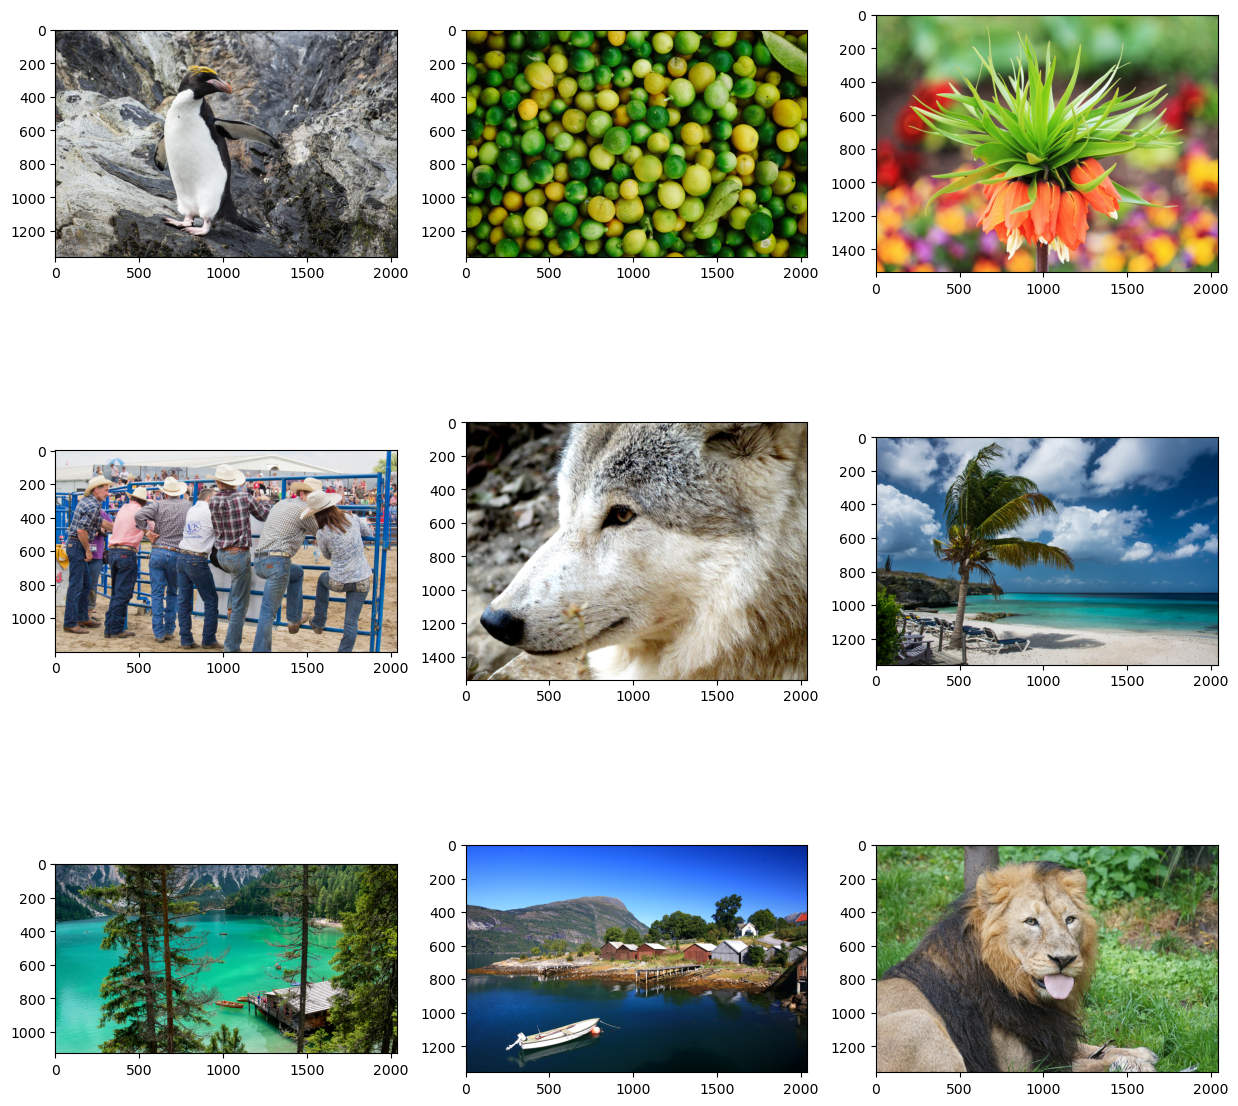

In [5]:
#Viewing first few images
num_i=9
plt.figure(figsize=(15,15))
for i in range(num_i):
  img=cv2.imread(os.path.join(images,image_list[i]))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.subplot(3,3,i+1)
  plt.imshow(img)
plt.show()

In [7]:
#Fuction for uniforming the size of all images to 400x270
def resize(image_path,opt_path,resize=(464,256)):
  img=cv2.imread(image_path)
  if img is not None:
    img_resized=cv2.resize(img,resize,interpolation=cv2.INTER_AREA)
    cv2.imwrite(opt_path,img_resized)
  else:
    print("Image not found")

In [ ]:
#Create a new folder named "resized" in the "content" folder. It is done to store the resized images in a folder

In [13]:
#Resizing every image in the list into a new folder named "resized"
for i in image_list:
  inp_path=os.path.join(images,i)
  opt_path=os.path.join('resize2',i)
  resize(inp_path,opt_path)

:#Continue from here using the resized images. Path:"/content/resized"

In [3]:
import os
import numpy as np
from PIL import Image
image_folder = "resize2"                  
output_fol = "numpysliced6"               
os.makedirs(output_fol, exist_ok=True)

valid_exts = ('.png', '.jpg', '.jpeg', )

for im in os.listdir(image_folder):
    if im.lower().endswith(valid_exts):
        img_path = os.path.join(image_folder, im)
        img = Image.open(img_path).convert("RGB")
        img_array = np.array(img)

        h, w, _ = img_array.shape
        h_mid = h // 2
        w_mid = w // 2

        base_name = os.path.splitext(im)[0]
        parts = {
            "top_left":     img_array[0:h_mid,    0:w_mid],
            "top_right":    img_array[0:h_mid,    w_mid:w],
            "bottom_left":  img_array[h_mid:h,    0:w_mid],
            "bottom_right": img_array[h_mid:h,    w_mid:w]
        }

        for part_name, part_array in parts.items():
            patch_img = Image.fromarray(part_array)
            out_name = f"{base_name}_{part_name}.jpg"
            out_path = os.path.join(output_fol, out_name)
            patch_img.save(out_path)
            print(f"Saved: {out_path} | Shape: {part_array.shape}")

print(f"\nAll images split into 4 parts and saved to: {output_fol}")


Saved: numpysliced6\0801_top_left.jpg | Shape: (128, 232, 3)
Saved: numpysliced6\0801_top_right.jpg | Shape: (128, 232, 3)
Saved: numpysliced6\0801_bottom_left.jpg | Shape: (128, 232, 3)
Saved: numpysliced6\0801_bottom_right.jpg | Shape: (128, 232, 3)
Saved: numpysliced6\0802_top_left.jpg | Shape: (128, 232, 3)
Saved: numpysliced6\0802_top_right.jpg | Shape: (128, 232, 3)
Saved: numpysliced6\0802_bottom_left.jpg | Shape: (128, 232, 3)
Saved: numpysliced6\0802_bottom_right.jpg | Shape: (128, 232, 3)
Saved: numpysliced6\0803_top_left.jpg | Shape: (128, 232, 3)
Saved: numpysliced6\0803_top_right.jpg | Shape: (128, 232, 3)
Saved: numpysliced6\0803_bottom_left.jpg | Shape: (128, 232, 3)
Saved: numpysliced6\0803_bottom_right.jpg | Shape: (128, 232, 3)
Saved: numpysliced6\0804_top_left.jpg | Shape: (128, 232, 3)
Saved: numpysliced6\0804_top_right.jpg | Shape: (128, 232, 3)
Saved: numpysliced6\0804_bottom_left.jpg | Shape: (128, 232, 3)
Saved: numpysliced6\0804_bottom_right.jpg | Shape: (128, 

In [6]:
import os
import zipfile
from PIL import Image

input_folder = "C:/Users/JAVEN1/Downloads/new_valid"  
if not os.path.isdir(input_folder):
    raise ValueError("Invalid or missing folder path.")

output_folder = "blurred4"
os.makedirs(output_folder, exist_ok=True)

scale_factor = 0.6  
image_count = 0

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(input_folder, filename)
        image = Image.open(img_path).convert("RGB")
        w, h = image.size
        new_size = (int(w * scale_factor), int(h * scale_factor))
        downscaled = image.resize(new_size, Image.BILINEAR)
        blurred = downscaled.resize((w, h), Image.BILINEAR)
        save_path = os.path.join(output_folder, filename)
        blurred.save(save_path)
        print(f"Blurred and saved: {save_path}")
        image_count += 1

if image_count == 0:
    print("No valid image files found in the folder.")
else:
    print(f"\nSuccessfully processed {image_count} images.")
output_zip = "new_blur_valid.zip"
with zipfile.ZipFile(output_zip, 'w') as zipf:
    for file in os.listdir(output_folder):
        file_path = os.path.join(output_folder, file)
        zipf.write(file_path, arcname=file)

print(f"\nOutput ZIP created: {output_zip}")


Blurred and saved: blurred4\0801.png
Blurred and saved: blurred4\0802.png
Blurred and saved: blurred4\0803.png
Blurred and saved: blurred4\0804.png
Blurred and saved: blurred4\0805.png
Blurred and saved: blurred4\0806.png
Blurred and saved: blurred4\0807.png
Blurred and saved: blurred4\0808.png
Blurred and saved: blurred4\0809.png
Blurred and saved: blurred4\0810.png
Blurred and saved: blurred4\0811.png
Blurred and saved: blurred4\0812.png
Blurred and saved: blurred4\0813.png
Blurred and saved: blurred4\0814.png
Blurred and saved: blurred4\0815.png
Blurred and saved: blurred4\0816.png
Blurred and saved: blurred4\0817.png
Blurred and saved: blurred4\0818.png
Blurred and saved: blurred4\0819.png
Blurred and saved: blurred4\0820.png
Blurred and saved: blurred4\0821.png
Blurred and saved: blurred4\0822.png
Blurred and saved: blurred4\0823.png
Blurred and saved: blurred4\0824.png
Blurred and saved: blurred4\0825.png
Blurred and saved: blurred4\0826.png
Blurred and saved: blurred4\0827.png
B

In [9]:
#ONLY FOR DOWNLOADING!!
import zipfile
output_folder =  "C:/Users/JAVEN1/Downloads/new_valid"
output_zip = "new_valid.zip"
with zipfile.ZipFile(output_zip, 'w') as zipf:
    for img_name in os.listdir(output_folder):
        full_path = os.path.join(output_folder, img_name) 
        zipf.write(full_path, arcname=img_name)            

print(f" Zipped folder created: {output_zip}")


 Zipped folder created: new_valid.zip
